#📌 Extracción

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
from google.colab import drive
drive.mount('/content/drive')
datos = pd.read_json('/content/drive/MyDrive/Challenge_DS2/TelecomX_Data.json')
datos.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [23]:
df = pd.json_normalize(datos.to_dict(orient='records'), sep='.')

df.columns = df.columns.str.replace('customer.', '', regex=False)
df.columns = df.columns.str.replace('phone.', '', regex=False)
df.columns = df.columns.str.replace('internet.', '', regex=False)
df.columns = df.columns.str.replace('account.', '', regex=False)
df.columns = df.columns.str.replace('Charges.', 'Charges.', regex=False)

df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [25]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [26]:
df.dtypes.value_counts()

,count
object,17
int64,2
float64,2


In [27]:
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [28]:
print(df[df['Charges.Total'].isnull()]['tenure'].value_counts())

tenure
0    11
Name: count, dtype: int64


In [30]:
df['Charges.Total'] = df['Charges.Total'].fillna(0.0)
df['Charges.Total'].isnull().sum()

np.int64(0)

In [31]:
df['customerID'].duplicated().sum()

np.int64(0)

In [36]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
df[['Charges.Monthly', 'Cuentas_Diarias']].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [38]:
columnas_binarias = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]

for col in columnas_binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [39]:
cols_no_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_no_internet:
    df[col] = df[col].replace('No internet service', 'No')

# Si deseas, luego los conviertes a 0/1
for col in cols_no_internet:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [40]:
df.rename(columns={
    'tenure': 'Meses_Contrato',
    'Charges.Monthly': 'Facturacion_Mensual',
    'Charges.Total': 'Facturacion_Total',
    'Cuentas_Diarias': 'Facturacion_Diaria'
}, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7267 non-null   object 
 1   Churn                7043 non-null   float64
 2   gender               7267 non-null   object 
 3   SeniorCitizen        7267 non-null   int64  
 4   Partner              7267 non-null   int64  
 5   Dependents           7267 non-null   int64  
 6   Meses_Contrato       7267 non-null   int64  
 7   PhoneService         7267 non-null   int64  
 8   MultipleLines        7267 non-null   object 
 9   InternetService      7267 non-null   object 
 10  OnlineSecurity       7267 non-null   int64  
 11  OnlineBackup         7267 non-null   int64  
 12  DeviceProtection     7267 non-null   int64  
 13  TechSupport          7267 non-null   int64  
 14  StreamingTV          7267 non-null   int64  
 15  StreamingMovies      7267 non-null   i

#📊 Carga y análisis

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
SeniorCitizen,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7267.0,0.484106,0.499782,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7267.0,0.300124,0.458343,0.000000,0.000000,0.000000,1.000000,1.000000
Meses_Contrato,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
PhoneService,7267.0,0.902711,0.296371,0.000000,1.000000,1.000000,1.000000,1.000000
OnlineSecurity,7267.0,0.285950,0.451897,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,7267.0,0.344571,0.475261,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,7267.0,0.342782,0.474672,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,7267.0,0.289528,0.453575,0.000000,0.000000,0.000000,1.000000,1.000000


In [46]:
columnas_numericas = [
    'Meses_Contrato',
    'Facturacion_Mensual',
    'Facturacion_Total',
    'Facturacion_Diaria'
]
df[columnas_numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
Meses_Contrato,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
Facturacion_Mensual,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
Facturacion_Total,7267.0,2277.182035,2268.648587,0.000000,396.200000,1389.200000,3778.525000,8684.800000
Facturacion_Diaria,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333


In [62]:
df['Churn'].value_counts(normalize=True) * 100


,proportion
Churn,
0.0,73.463013
1.0,26.536987


In [61]:
tabla_churn = df.groupby('Churn')[columnas_numericas].agg(['mean', 'median', 'std', 'min', 'max'])
tabla_churn.index = tabla_churn.index.map({0:'Evadidos' , 1: 'Suscritos'})
tabla_churn.T

Churn                          Evadidos    Suscritos
Meses_Contrato      mean      37.569965    17.979133
                    median    38.000000    10.000000
                    std       24.113777    19.531123
                    min        0.000000     1.000000
                    max       72.000000    72.000000
Facturacion_Mensual mean      61.265124    74.441332
                    median    64.425000    79.650000
                    std       31.092648    24.666053
                    min       18.250000    18.850000
                    max      118.750000   118.350000
Facturacion_Total   mean    2549.911442  1531.796094
                    median  1679.525000   703.550000
                    std     2329.954215  1890.822994
                    min        0.000000    18.850000
                    max     8672.450000  8684.800000
Facturacion_Diaria  mean       2.042171     2.481378
                    median     2.147500     2.655000
                    std        1.036422     0.822202
                    min        0.608333     0.628333
                    max        3.958333     3.945000

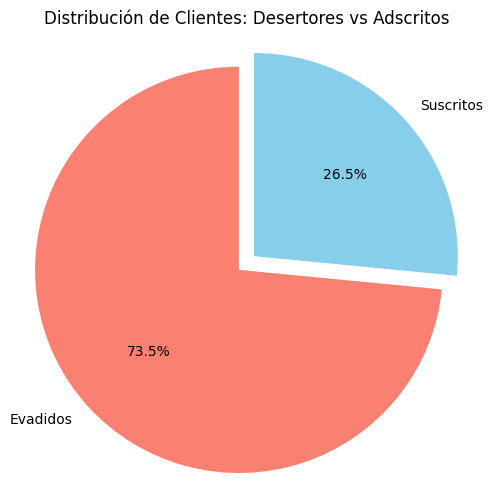

In [63]:
import matplotlib.pyplot as plt

# Conteo de clientes por churn
valores_churn = df['Churn'].value_counts()
etiquetas = ['Evadidos' ,'Suscritos']  # 0 = desertores, 1 = adscritos

# Colores opcionales
colores = ['salmon', 'skyblue']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(valores_churn, labels=etiquetas, autopct='%1.1f%%', colors=colores, startangle=90, explode=(0.1, 0))
plt.title('Distribución de Clientes: Desertores vs Adscritos')
plt.axis('equal')
plt.show()


/tmp/ipython-input-1356784707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_churn, palette=['salmon', 'skyblue'])


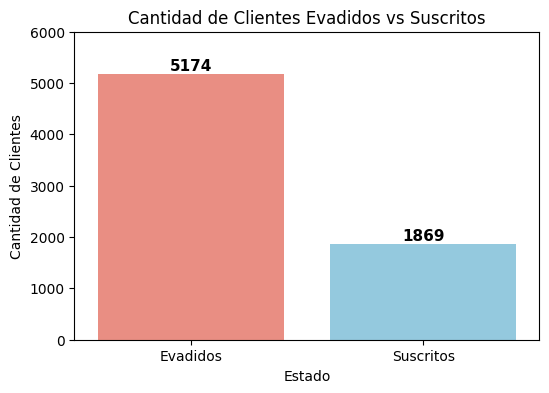

In [67]:
df_churn = df['Churn'].map({0: 'Evadidos', 1: 'Suscritos'})

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df_churn, palette=['salmon', 'skyblue'])

for p in ax.patches:
    altura = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # posición x
        altura + 5,                     # posición y
        f'{int(altura)}',              # texto a mostrar
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )

plt.title('Cantidad de Clientes Evadidos vs Suscritos')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Clientes')
plt.ylim(0, 6000)
plt.show()

In [69]:
tabla_Genero = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100
tabla_Genero.columns = ['Evadidos', 'Suscritos']  # 0 → evadidos, 1 → suscritos
tabla_Genero

,Evadidos,Suscritos
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


/tmp/ipython-input-1945488086.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=datos, x=var, y='Proporcion_Evadidos', palette='Set2', ax=ax)
/tmp/ipython-input-1945488086.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=datos, x=var, y='Proporcion_Evadidos', palette='Set2', ax=ax)
/tmp/ipython-input-1945488086.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=datos, x=var, y='Proporcion_Evadidos', palette='Set2', ax=ax)
/tmp/ipython-input-1945488086.py:56: FutureWarning: 

Passing `palette` without assigning `hue` i

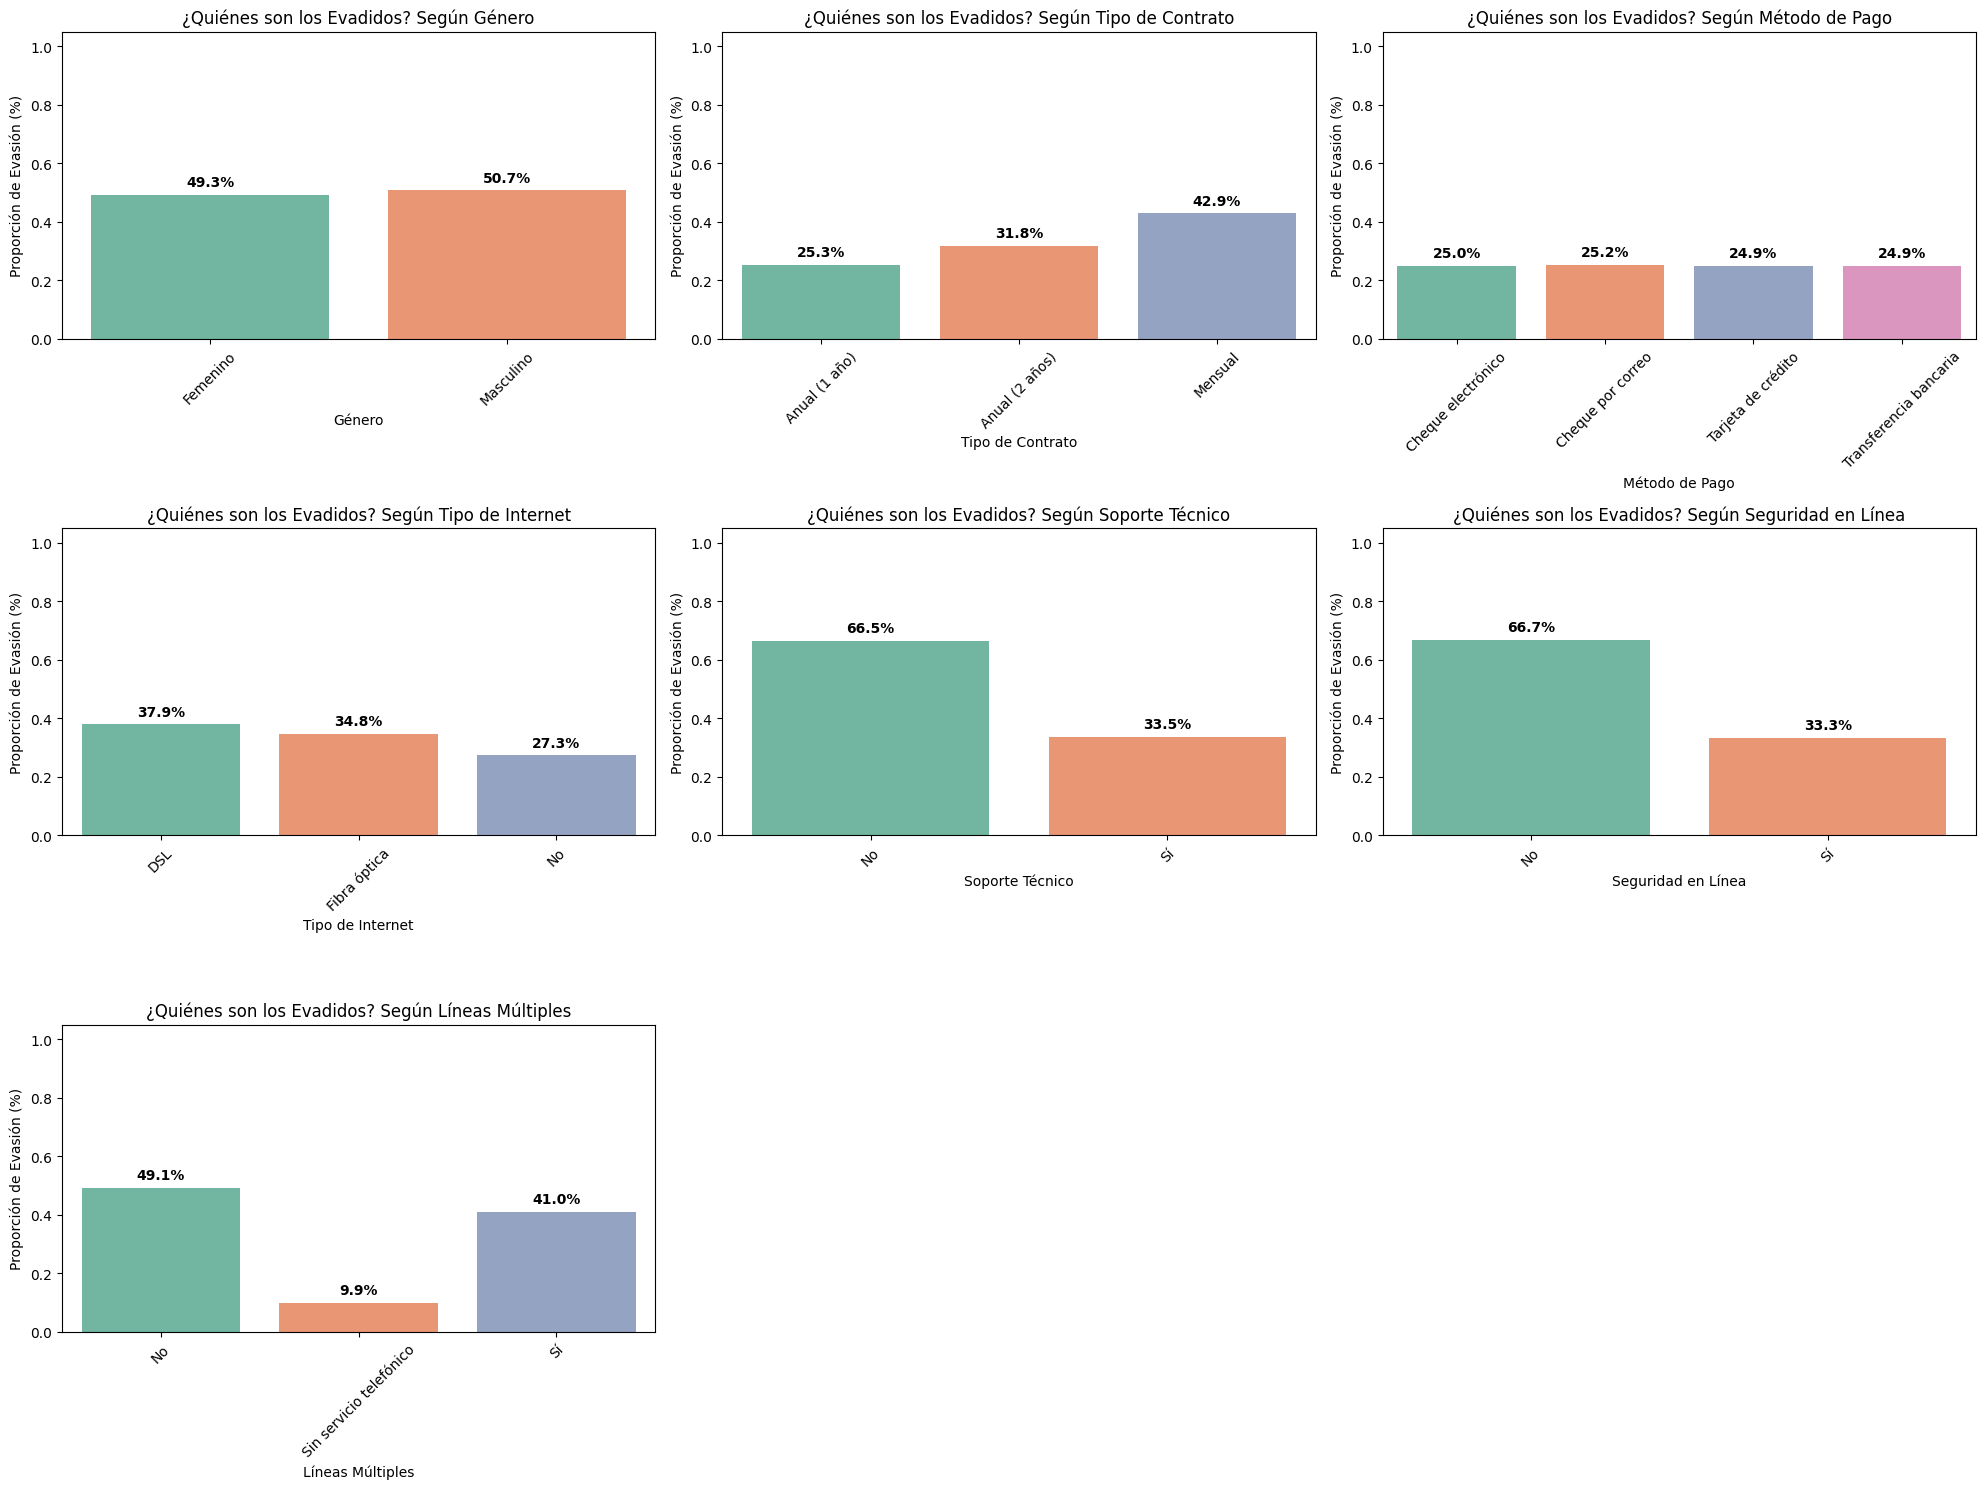

In [90]:
variables_categoricas = [
    'gender', 'Contract', 'PaymentMethod', 'InternetService',
    'TechSupport', 'OnlineSecurity', 'MultipleLines'
]

# Traducción de nombres de columnas
traducciones_vars = {
    'gender': 'Género',
    'Contract': 'Tipo de Contrato',
    'PaymentMethod': 'Método de Pago',
    'InternetService': 'Tipo de Internet',
    'TechSupport': 'Soporte Técnico',
    'OnlineSecurity': 'Seguridad en Línea',
    'MultipleLines': 'Líneas Múltiples'
}

# Traducción de valores dentro de columnas
traducciones_valores = {
    'Male': 'Masculino',
    'Female': 'Femenino',
    'Month-to-month': 'Mensual',
    'One year': 'Anual (1 año)',
    'Two year': 'Anual (2 años)',
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer (automatic)': 'Transferencia bancaria',
    'Credit card (automatic)': 'Tarjeta de crédito',
    'DSL': 'DSL',
    'Fiber optic': 'Fibra óptica',
    'No': 'Sin Internet',
    'No internet service': 'Sin Internet',
    'No phone service': 'Sin servicio telefónico',
    'Yes': 'Sí',
    'No': 'No'
}


binarias_0_1 = ['TechSupport', 'OnlineSecurity']

fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()

for i, var in enumerate(variables_categoricas):
    evadidos = df[df['Churn'] == 0].copy()

    if var in binarias_0_1:
        evadidos[var] = evadidos[var].map({1: 'Sí', 0: 'No'})
    else:
        evadidos[var] = evadidos[var].replace(traducciones_valores)

    proporciones = evadidos[var].value_counts(normalize=True).sort_index()
    datos = proporciones.reset_index()
    datos.columns = [var, 'Proporcion_Evadidos']

    ax = axs[i]
    sns.barplot(data=datos, x=var, y='Proporcion_Evadidos', palette='Set2', ax=ax)

    for p in ax.patches:
        valor = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            valor + 0.02,
            f'{valor*100:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

    ax.set_title(f'¿Quiénes son los Evadidos? Según {traducciones_vars.get(var, var)}')
    ax.set_ylabel('Proporción de Evasión (%)')
    ax.set_xlabel(traducciones_vars.get(var, var))
    ax.set_ylim(0, 1.05)
    ax.tick_params(axis='x', rotation=45)

# Ocultar los subplots vacíos (si hay menos de 9)
for j in range(len(variables_categoricas), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


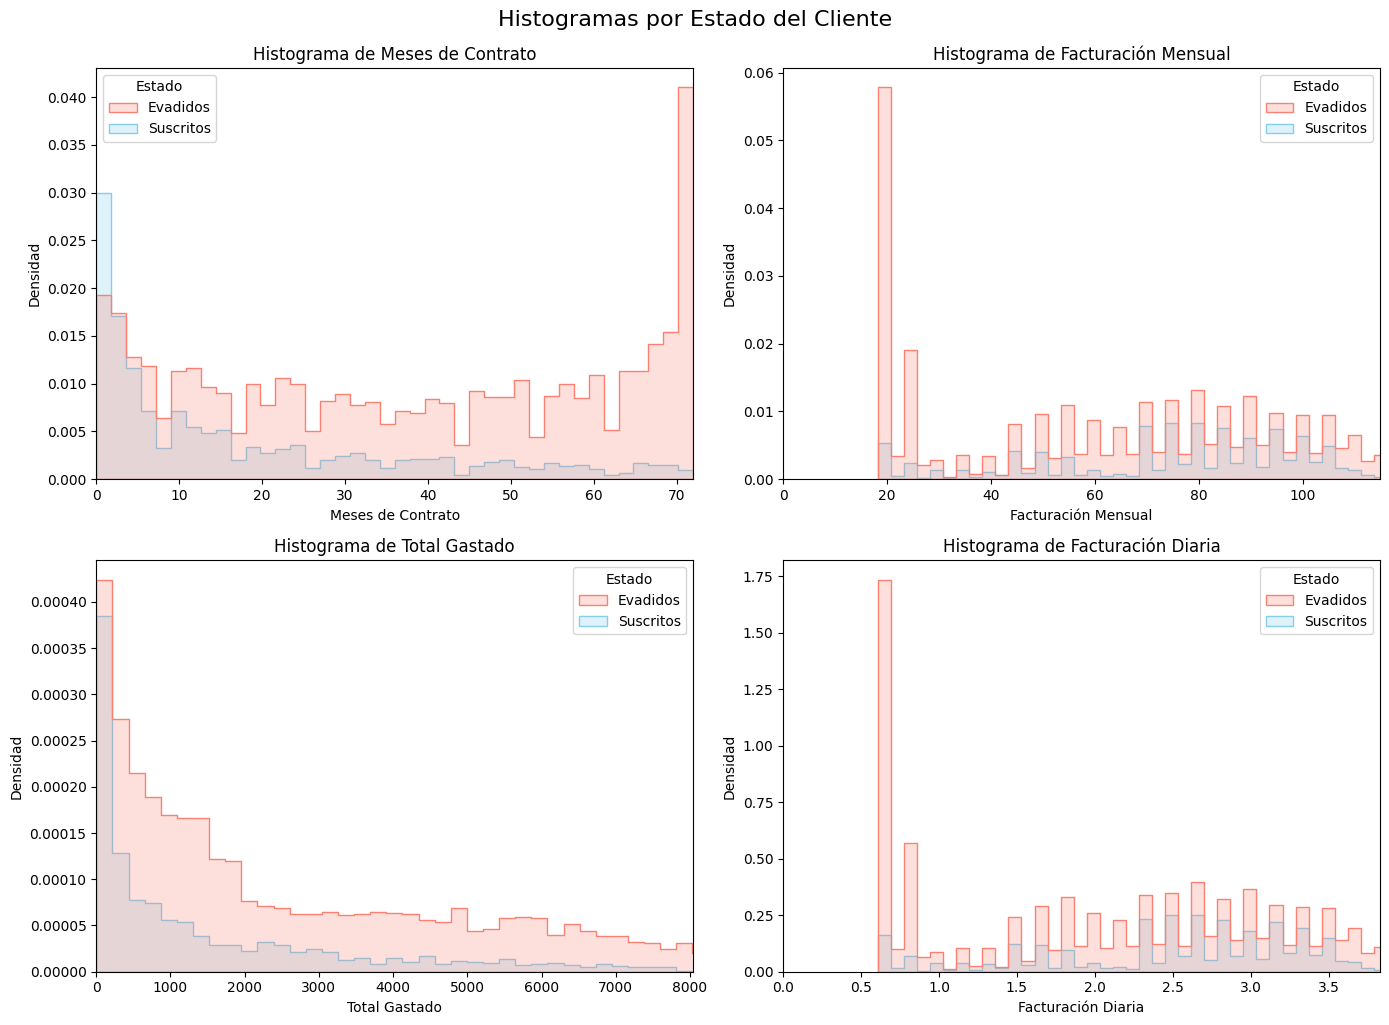

In [83]:
variables_numericas = ['Meses_Contrato',
    'Facturacion_Mensual',
    'Facturacion_Total',
    'Facturacion_Diaria']

titulos = {
    'Facturacion_Mensual': 'Facturación Mensual',
    'Facturacion_Total': 'Total Gastado',
    'Meses_Contrato': 'Meses de Contrato',
    'Facturacion_Diaria': 'Facturación Diaria'
}

df['Estado'] = df['Churn'].map({0: 'Evadidos', 1: 'Suscritos'})

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for ax, var in zip(axs.flatten(), variables_numericas):
    sns.histplot(data=df, x=var, hue='Estado', kde=False, bins=40,
                 element="step", stat='density', palette=['salmon', 'skyblue'], ax=ax)
    ax.set_title(f'Histograma de {titulos[var]}')
    ax.set_xlabel(titulos[var])
    ax.set_ylabel('Densidad')
    ax.set_xlim(0, df[var].quantile(0.99))  # evita colas largas
plt.tight_layout()
plt.suptitle("Histogramas por Estado del Cliente", fontsize=16, y=1.02)
plt.show()



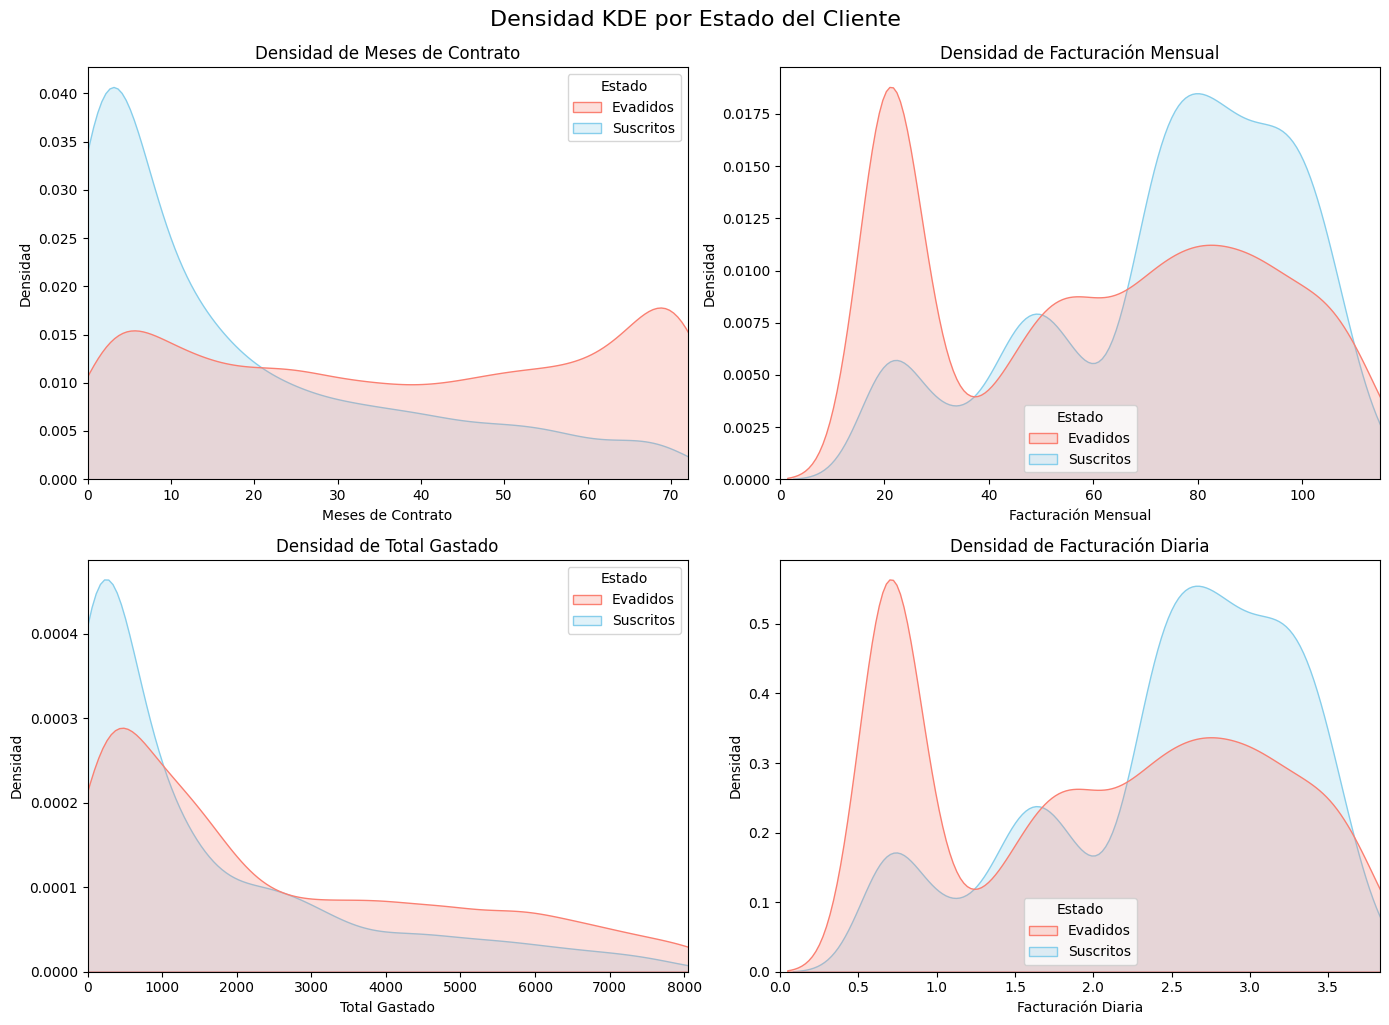

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for ax, var in zip(axs.flatten(), variables_numericas):
    sns.kdeplot(data=df, x=var, hue='Estado', fill=True,
                common_norm=False, palette=['salmon', 'skyblue'], ax=ax)
    ax.set_title(f'Densidad de {titulos[var]}')
    ax.set_xlabel(titulos[var])
    ax.set_ylabel('Densidad')
    ax.set_xlim(0, df[var].quantile(0.99))
plt.tight_layout()
plt.suptitle("Densidad KDE por Estado del Cliente", fontsize=16, y=1.02)
plt.show()

/tmp/ipython-input-3674246676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Estado', y=var, palette=['salmon', 'skyblue'], inner='quartile', ax=ax)
/tmp/ipython-input-3674246676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Estado', y=var, palette=['salmon', 'skyblue'], inner='quartile', ax=ax)
/tmp/ipython-input-3674246676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Estado', y=var, palette=['salmon', 'skyblue'], inner='quartile', ax=ax)
/tmp/ipython-input-3674246676.py:4: Futu

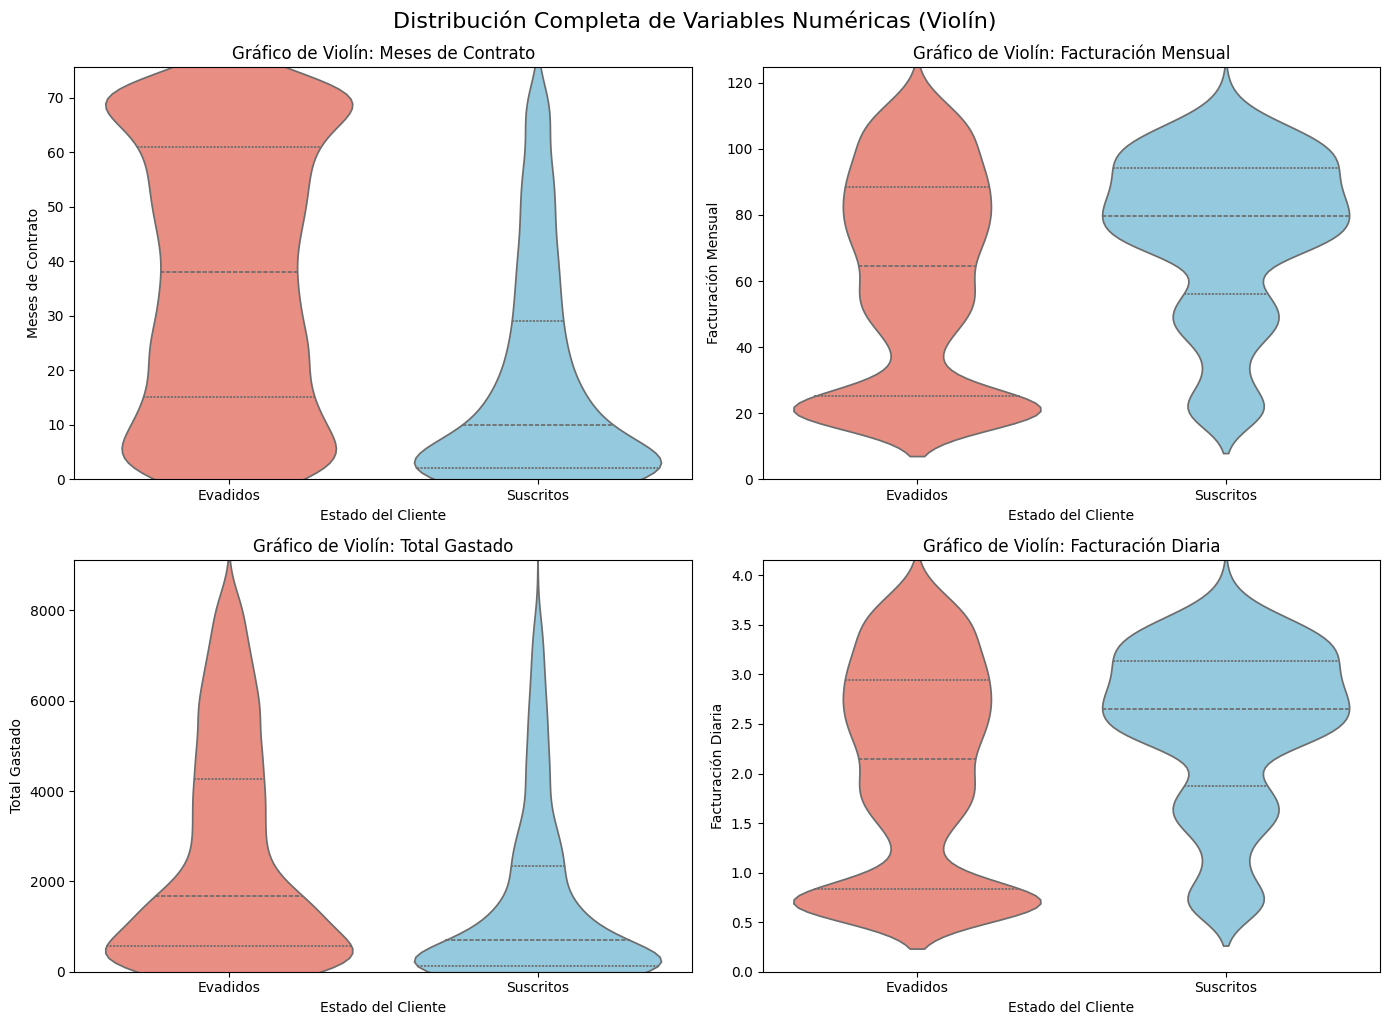

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for ax, var in zip(axs.flatten(), variables_numericas):
    sns.violinplot(data=df, x='Estado', y=var, palette=['salmon', 'skyblue'], inner='quartile', ax=ax)
    ax.set_title(f'Gráfico de Violín: {titulos[var]}')
    ax.set_xlabel('Estado del Cliente')
    ax.set_ylabel(titulos[var])

    # Ajustar eje Y al máximo + 5%
    max_val = df[var].max()
    ax.set_ylim(0, max_val * 1.05)

plt.tight_layout()
plt.suptitle("Distribución Completa de Variables Numéricas (Violín)", fontsize=16, y=1.02)
plt.show()

/tmp/ipython-input-1725737407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Estado', y=var, palette=['salmon', 'skyblue'], ax=ax, showfliers=True)
/tmp/ipython-input-1725737407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Estado', y=var, palette=['salmon', 'skyblue'], ax=ax, showfliers=True)
/tmp/ipython-input-1725737407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Estado', y=var, palette=['salmon', 'skyblue'], ax=ax, showfliers=True)
/tmp/ipython-input-1725737407.py:4: FutureWarning: 


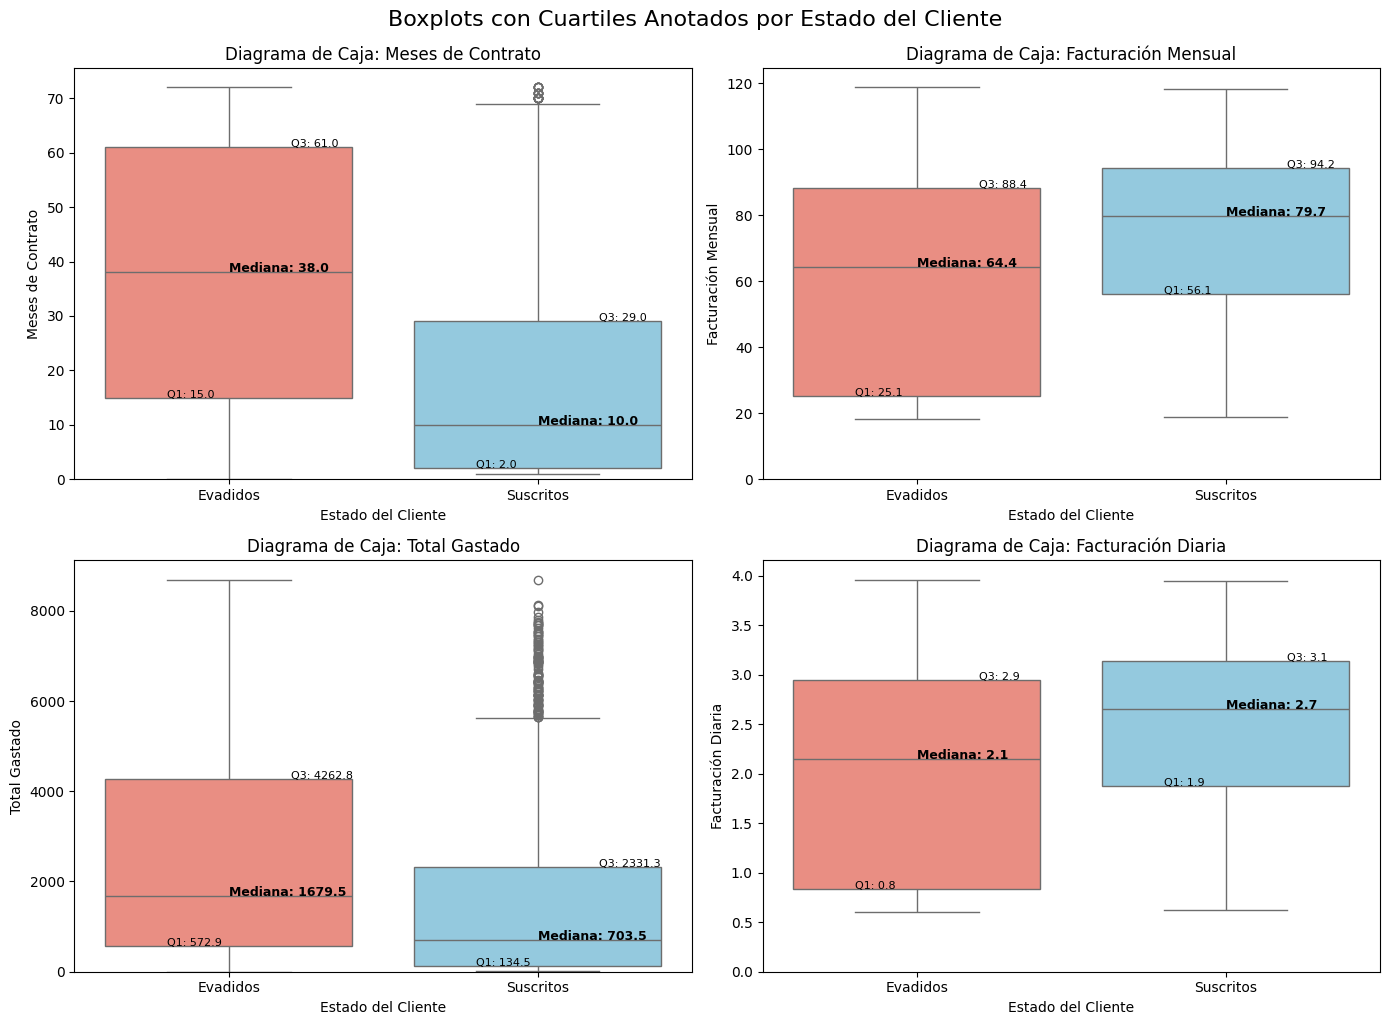

In [89]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for ax, var in zip(axs.flatten(), variables_numericas):
    sns.boxplot(data=df, x='Estado', y=var, palette=['salmon', 'skyblue'], ax=ax, showfliers=True)
    ax.set_title(f'Diagrama de Caja: {titulos[var]}')
    ax.set_xlabel('Estado del Cliente')
    ax.set_ylabel(titulos[var])

    # Ajustar eje Y
    max_val = df[var].max()
    ax.set_ylim(0, max_val * 1.05)

    # Calcular cuartiles por grupo
    for i, estado in enumerate(['Evadidos', 'Suscritos']):
        q1 = df[df['Estado'] == estado][var].quantile(0.25)
        q2 = df[df['Estado'] == estado][var].quantile(0.5)
        q3 = df[df['Estado'] == estado][var].quantile(0.75)

        # Anotar los valores encima de las líneas de caja
        ax.text(i - 0.2, q1, f'Q1: {q1:.1f}', color='black', fontsize=8)
        ax.text(i, q2, f'Mediana: {q2:.1f}', color='black', fontsize=9, fontweight='bold')
        ax.text(i + 0.2, q3, f'Q3: {q3:.1f}', color='black', fontsize=8)

plt.tight_layout()
plt.suptitle("Boxplots con Cuartiles Anotados por Estado del Cliente", fontsize=16, y=1.02)
plt.show()

#📄Informe final

## Introducción

El presente informe tiene como objetivo analizar el fenómeno de evasión de clientes (churn) en una empresa de telecomunicaciones. Este fenómeno representa un problema crítico, ya que una gran proporción de usuarios abandona el servicio, afectando los ingresos recurrentes de la compañía. A través de este análisis exploratorio, se pretende entender los patrones de comportamiento de los clientes y encontrar posibles factores que inciden en la evasión, como base para futuras acciones predictivas y estratégicas.

## Limpieza y tratamiento de datos

Se trabajó con un conjunto de datos crudos que contenían múltiples columnas con diferentes tipos de datos. Las acciones realizadas incluyeron:



1.   Importación del archivo JSON original.
2.   Renombramiento de columnas para mayor claridad (por ejemplo, MonthlyCharges a Facturación_Mensual).
1.   Reemplazo de valores categóricos como "Yes"/"No" por 1/0 para análisis numéricos.
2.   Revisión de valores nulos y tratamiento específico en Cargos_Totales, donde se imputaron valores faltantes con ceros.
1.   Eliminación de duplicados basados en el identificador de cliente.
2.   Generación de nuevas columnas como Facturación_Diaria, dividiendo la facturación mensual entre 30.
1.   Traducción de valores categóricos (género, tipo de internet, etc.) al español para facilitar el entendimiento del equipo de análisis.





## Analisis Exploratorio de Datos

Se evidenció una proporción significativa de clientes evadidos, lo cual justifica este análisis.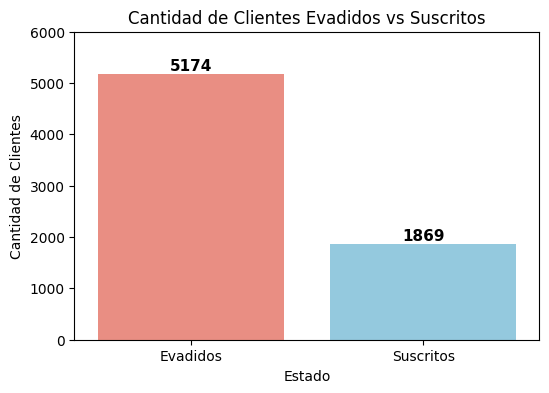

Mediante boxplots, gráficos de violín, histogramas y gráficos de densidad KDE, se exploró el comportamiento de variables como:

*   Meses de Contrato

*   Facturación Mensual

*   Total Gastado

*   Facturación Diaria

Se observa que los clientes evadidos tienen menor tiempo de contrato y menor gasto acumulado, en promedio.


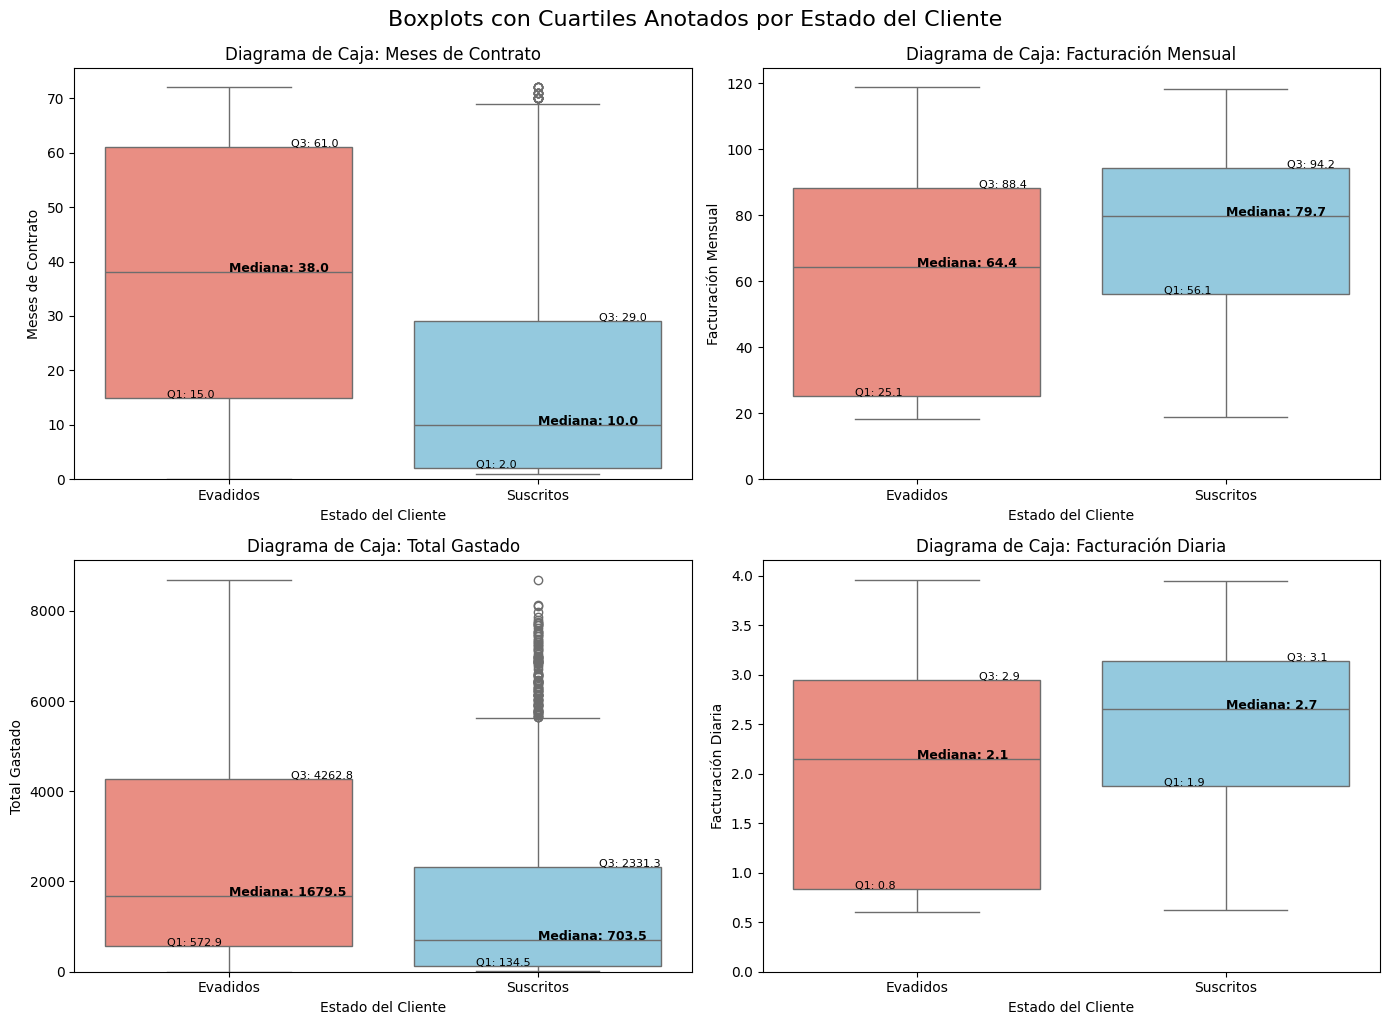

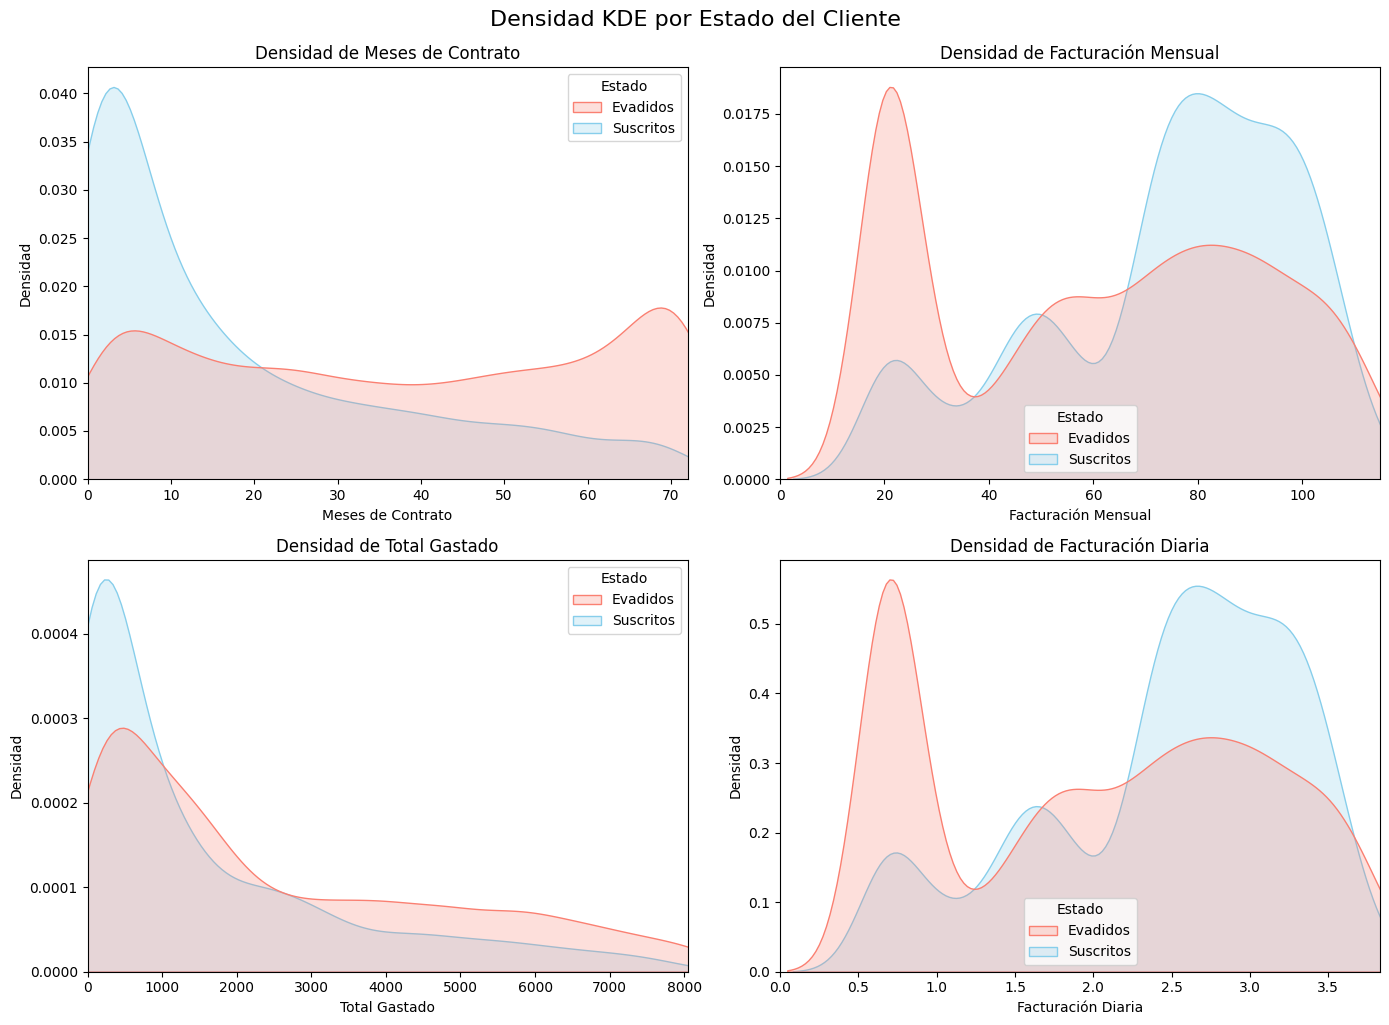

Se analizaron proporciones de evasión (clientes evadidos) respecto a categorías como:

*   **Genero:** El análisis muestra una distribución bastante equitativa entre géneros respecto a la evasión. Esto indica que el género no es un factor determinante en la deserción, y la proporción de evasión es muy similar para ambos grupos.

*   **Tipo de Internet:** Mayor evasión en DSL y Fibra, menor en quienes no tienen Internet.

*   **Método de Pago:** Las cuatro opciones se distribuyen de forma muy similar.

*   **Tipo de Contrato:** Los contratos mensuales tienen más evasión (42.9%), en comparación con los anuales.

*   **Soporte Técnico y Seguridad en Línea:** Se observa mayor evasión entre quienes no cuentan con estos servicios.

*   **Líneas Múltiples:** La evasión se concentra en quienes no tienen líneas múltiples o no tienen teléfono.

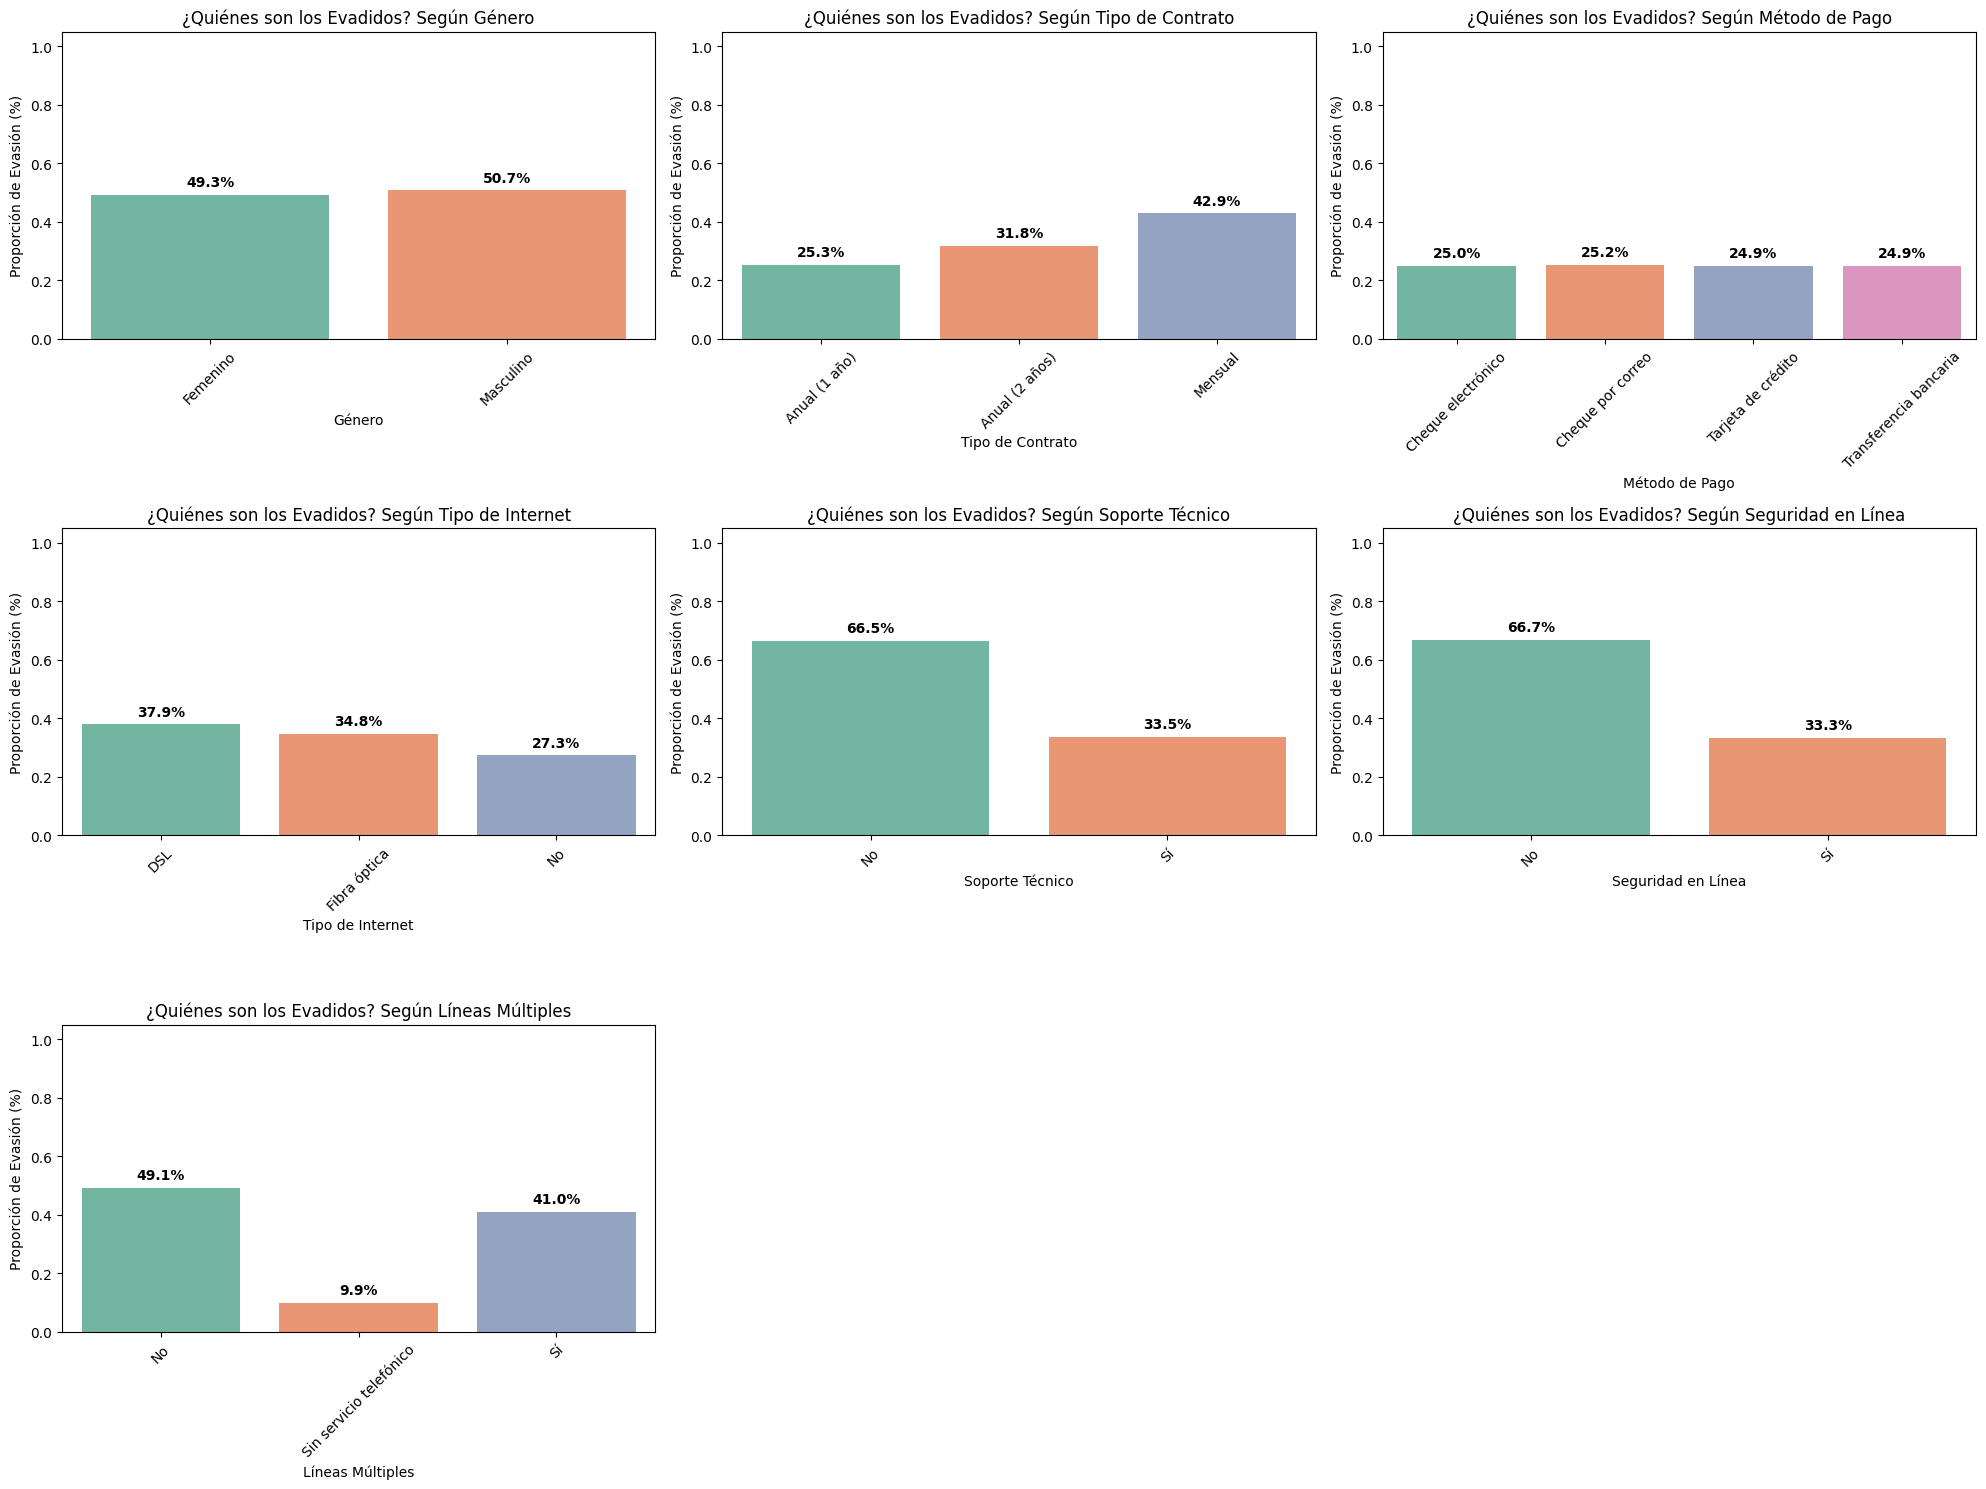

## Conclusiones e Insights

Los clientes que abandonan el servicio tienen, en promedio, menos meses de contrato y menor gasto acumulado.

Existe una fuerte correlación entre contratos mensuales y la evasión, lo que indica una relación entre flexibilidad y abandono.

La ausencia de servicios adicionales como seguridad en línea y soporte técnico también está vinculada con una mayor tasa de deserción.

El tipo de conexión a Internet podría estar influenciando la percepción de calidad del servicio, lo cual repercute en la permanencia del cliente.

## Recomendaciones

Fomentar contratos a largo plazo (anuales) mediante promociones o beneficios exclusivos.

Ofrecer soporte técnico y seguridad como parte del paquete básico, para retener más clientes.

Analizar la calidad del servicio DSL y Fibra, pues estos usuarios muestran tasas más altas de evasión.

Crear campañas de retención personalizadas para clientes con bajo gasto y pocos meses de contrato.

Incluir un sistema de alertas tempranas basado en el comportamiento de facturación y uso para anticipar la evasión.